# Jupyter Data Science Workflow Example
Unsupervised Analysis of Days of Week for Bike Crossing data


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture


## Get Data

In [2]:
from jupyterworkflow.data import get_bike_count_df
df = get_bike_count_df()
df.head()

,Total,East,West
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


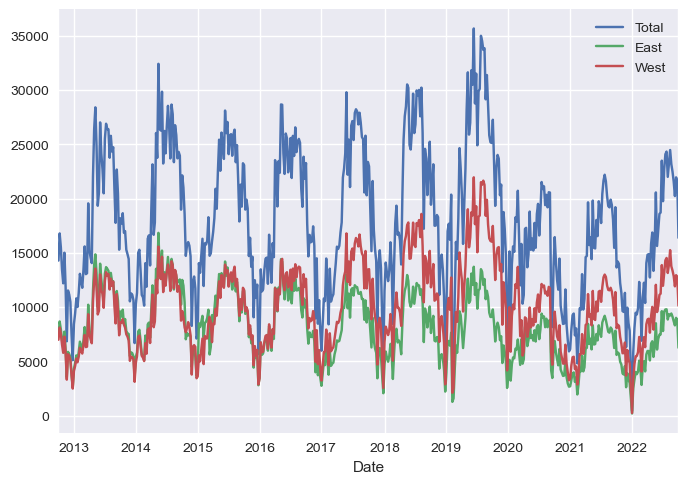

In [3]:
df.resample('W').sum().plot();

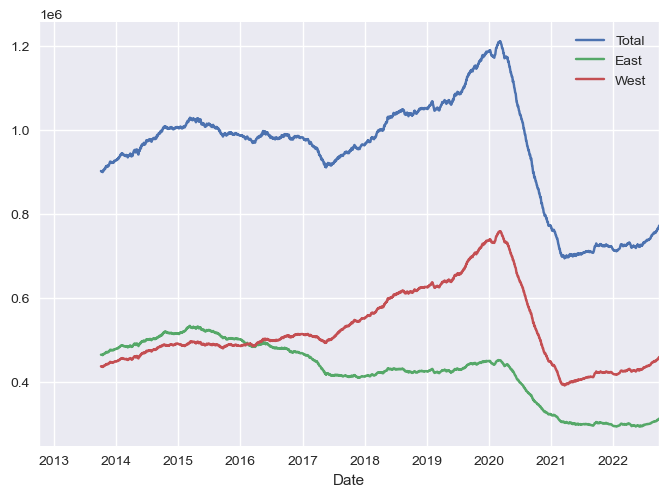

In [4]:
df.resample('D').sum().rolling(365).sum().plot();

<AxesSubplot:xlabel='time'>

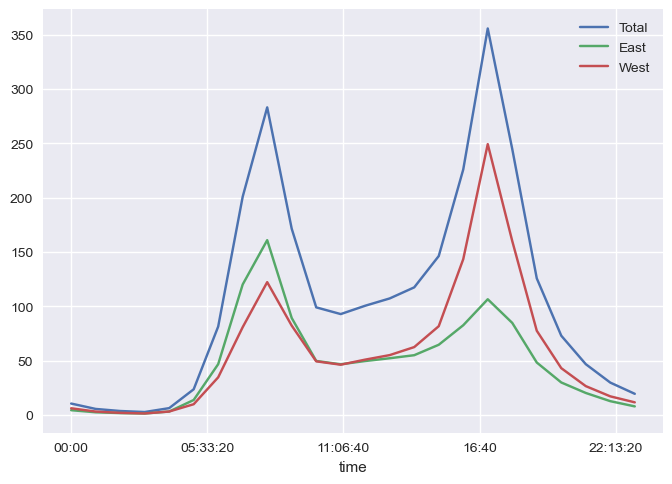

In [5]:
df.groupby(df.index.time).mean().plot();

In [6]:
pivoted = df.pivot_table('Total', index=df.index.time, columns=df.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


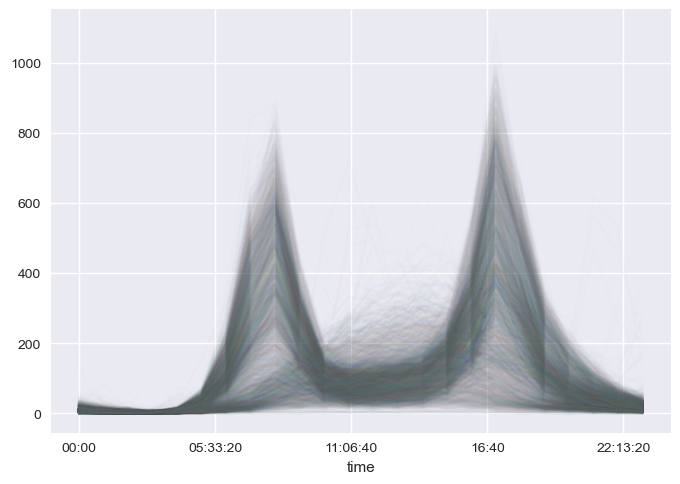

In [7]:
 pivoted.plot(legend=False, alpha=0.01);

## Principal Component Analysis

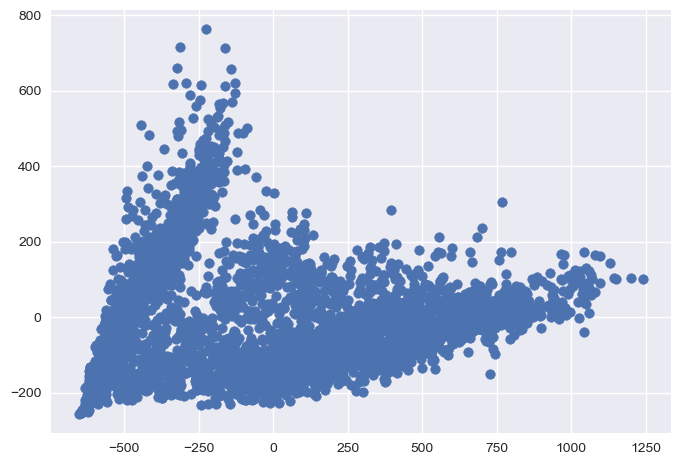

In [8]:
X = pivoted.fillna(0).T.values
X2 = PCA(2, svd_solver='full').fit_transform(X)
plt.scatter(X2[: ,0], X2[:, 1]);

## Unsupervised Clustering - Gaussian Mixture

In [9]:
gmm = GaussianMixture(2)
gmm.fit(X)
labels = gmm.predict(X)
labels

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

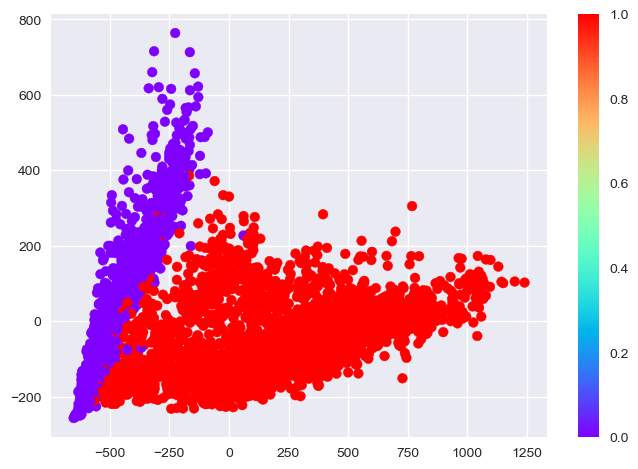

In [10]:
plt.scatter(X2[: ,0], X2[:, 1], c=labels, cmap='rainbow')
plt.colorbar()

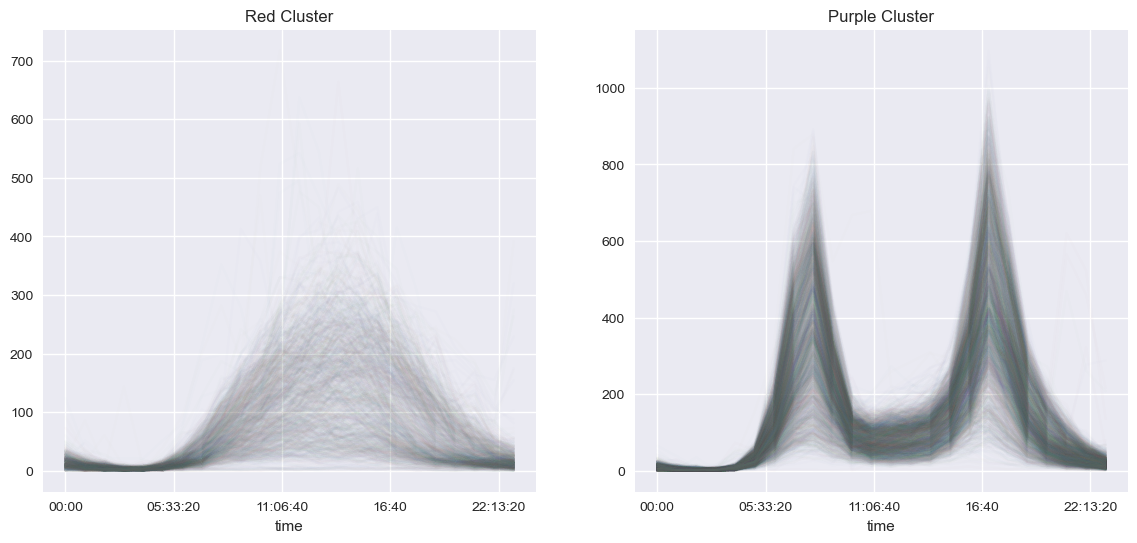

In [19]:
fix, ax = plt.subplots(1, 2, figsize=(14,6))
pivoted.T[labels == 0].T.plot(legend=False, alpha=0.01, ax=ax[0])
pivoted.T[labels == 1].T.plot(legend=False, alpha=0.01, ax=ax[1])
ax[0].set_title('Red Cluster')
ax[1].set_title('Purple Cluster');

## Comparing with Days of Week

In [13]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek
dayofweek

Int64Index([2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
            ...
            2, 3, 4, 5, 6, 0, 1, 2, 3, 4],
           dtype='int64', length=3650)

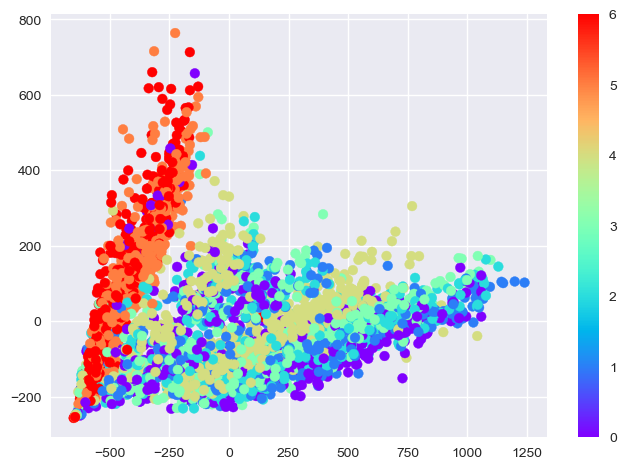

In [14]:
plt.scatter(X2[: ,0], X2[:, 1], c=dayofweek, cmap='rainbow')
plt.colorbar()

## Analyzing Outliers 
The following data points are weekdays with a non-commute pattern, including federal holidays.

In [15]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 0) & (dayofweek < 5)]

DatetimeIndex(['2012-11-22', '2012-11-23', '2012-12-25', '2013-01-01',
               '2013-05-27', '2013-07-04', '2013-07-05', '2013-09-02',
               '2013-11-28', '2013-11-29', '2013-12-20', '2013-12-25',
               '2014-01-01', '2014-04-23', '2014-05-26', '2014-07-04',
               '2014-09-01', '2014-11-27', '2014-12-25', '2015-01-01',
               '2015-05-25', '2015-07-03', '2015-09-07', '2015-11-26',
               '2015-11-27', '2015-12-25', '2016-01-01', '2016-05-30',
               '2016-07-04', '2016-09-05', '2016-11-24', '2016-11-25',
               '2016-12-26', '2017-01-02', '2017-02-06', '2017-05-29',
               '2017-07-04', '2017-09-04', '2017-11-23', '2017-11-24',
               '2017-12-25', '2018-01-01', '2018-05-28', '2018-07-04',
               '2018-09-03', '2018-11-22', '2018-11-23', '2018-12-25',
               '2019-01-01', '2019-02-04', '2019-02-05', '2019-02-08',
               '2019-02-11', '2019-02-12', '2019-05-27', '2019-07-04',
      